# Stochastic Block Model 
We will explore the relation between mis-clustering rate
between the probability gap $\epsilon$.

In [2]:
import numpy as np
def generate_random_symmetric_matrix(N):
  # generate_random_symmetric_matrix from uniform distribution
  a = np.random.uniform(0,1,(N,N))
  m = np.tril(a) + np.tril(a, -1).T
  return m

generate_random_symmetric_matrix(5)

array([[0.04073901, 0.91398904, 0.40394606, 0.96744071, 0.11529638],
       [0.91398904, 0.69687795, 0.35428992, 0.73550064, 0.2678634 ],
       [0.40394606, 0.35428992, 0.77961952, 0.7724379 , 0.06110118],
       [0.96744071, 0.73550064, 0.7724379 , 0.84553956, 0.5528254 ],
       [0.11529638, 0.2678634 , 0.06110118, 0.5528254 , 0.09993677]])

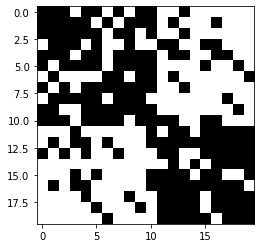

In [4]:
def generate_random_adjacency_matrix(n, p):
  # generate_random_adjacency_matrix with probability p if 
  # (i,j) from the same commnity
  B = generate_random_symmetric_matrix(n) # n is assumed to be even
  for i in range(n):
    for j in range(n):
      if i <= n/2 and j <= n/2:
        if B[i,j] >= p: B[i,j] = 0
        else: B[i,j] = 1
      elif i <= n/2 and j > n/2:
        if B[i,j] >= (1-p): B[i,j] = 0
        else: B[i,j] = 1
      elif i >= n/2 and j <= n/2:
        if B[i,j] >= (1-p): B[i,j] = 0
        else: B[i,j] = 1
      else:
        if B[i,j] >= p: B[i,j] = 0
        else: B[i,j] = 1
  return B

# Now we draw the adjacency matrix
import matplotlib.pyplot as plt
# change the sign of B to use black to denote there is an edge. 
plt.imshow(-generate_random_adjacency_matrix(20, 0.8), origin="upper", cmap="gray")

In [9]:
from numpy import linalg as LA
def SBM_model(num_nodes, eps):
  '''
  SBM model
  input: 
    num_nodes: the number of nodes or number of people needed to be clustered
    eps: epilson or probability gap
  output:
    miss clustering rate
  '''

  p = (1+eps)/2
  q = (1-eps)/2

  # compute surrogate matrix
  A = generate_random_adjacency_matrix(num_nodes,p)
  M = A - (p+q)/2 * np.ones((num_nodes,num_nodes))
  w, v = LA.eig(M) # eigen-decomposition

  # find leading eigenvector and predict
  max_ind = np.argmax(w)
  u = v[:,max_ind] # leading eigenvector
  mask = u > 0 # find boolean mask
  cluster = 2*mask -1 # make rounding output with +1 -1

  # generate truth membership with +1 the first half 
  # and -1 the second half
  truth_membership = np.concatenate((np.ones(int(num_nodes/2)), 
                                     -1*np.ones(int(num_nodes/2))))
  # calculate miss clustering rate
  mis_cluster_rate = min(np.sum(truth_membership != cluster), 
                         np.sum(truth_membership != (-1*cluster)))/num_nodes
  return mis_cluster_rate

SBM_model(50, 0.2)

0.08

In [14]:
eps_list = np.linspace(0, 0.5, 50)
error_rate_avg_record = []
for e in eps_list:
  error_rate_list = []
  for i in range(200):
    error_rate_list.append(SBM_model(100, e))
  avg = np.average(error_rate_list)
  error_rate_avg_record.append(avg)

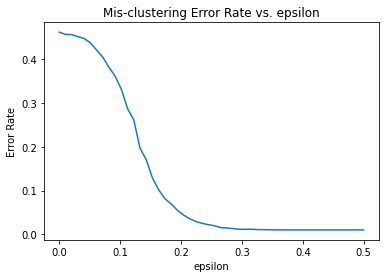

In [19]:
plt.plot(eps_list, error_rate_avg_record)
plt.xlabel("epsilon")
plt.ylabel("Error Rate")
plt.title("Mis-clustering Error Rate vs. epsilon")
plt.show()